# Statistics for Data Science with Python Final Project

## Project Case Scenario

**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

Details regarding the project will be broken down in the next reading sections.

## Overview of Project Tasks

**Final Project:** For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

**Project Tasks:**

**Task 1:** Familiarize yourself with the dataset 

**Task 2:** (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

**Task 3:** Load the dataset in a Jupyter Notebook using Watson Studio.

**Task 4:** Generate basic statistics and visualizations for upper management. 

**Task 5:** Use the appropriate tests to answer the questions provided.

**Task 6:** Share your Jupyter Notebook.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $$1000's

In [2]:
# Load dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Generate Descriptibe Statistics snd Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

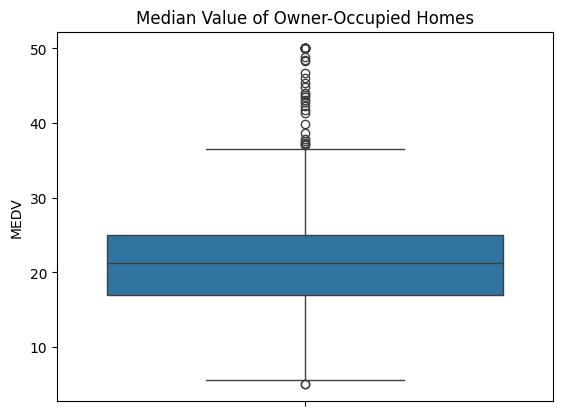

In [6]:
# Create a boxplot for the 'MEDV' column which represents the median value of owner-occupied homes
sns.boxplot(y='MEDV', data=boston_df)

# Set the title for the plot
plt.title('Median Value of Owner-Occupied Homes')

# Display the plot
plt.show()

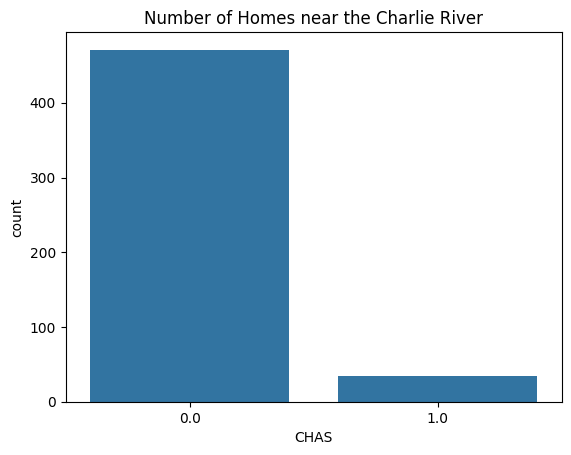

In [21]:
# Create a bar plot for the 'CHAS' variable
sns.countplot(x='CHAS', data=boston_df)

# Set the title for the plot
plt.title('Number of Homes near the Charlie River')

# Display plot
plt.show()

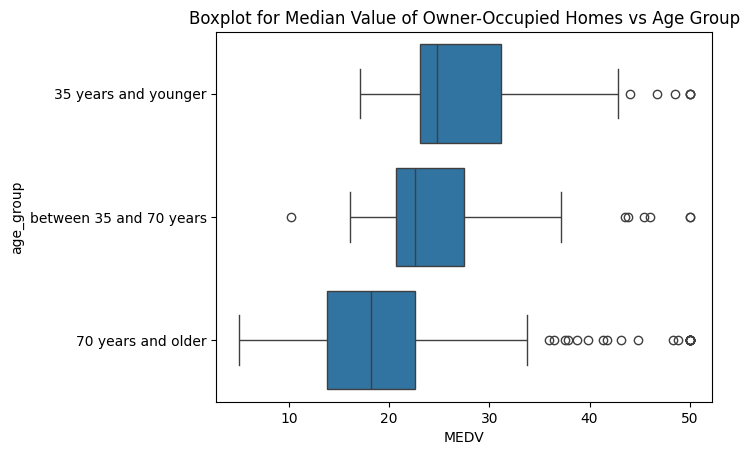

In [22]:
# Discretize the 'AGE' variable into three groups
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create a boxplot for the 'MEDV' variable vs the 'age_group' variable
sns.boxplot(x='MEDV', y='age_group', data=boston_df)

# Set the title for the plot
plt.title('Boxplot for Median Value of Owner-Occupied Homes vs Age Group')

# Display the plot
plt.show()

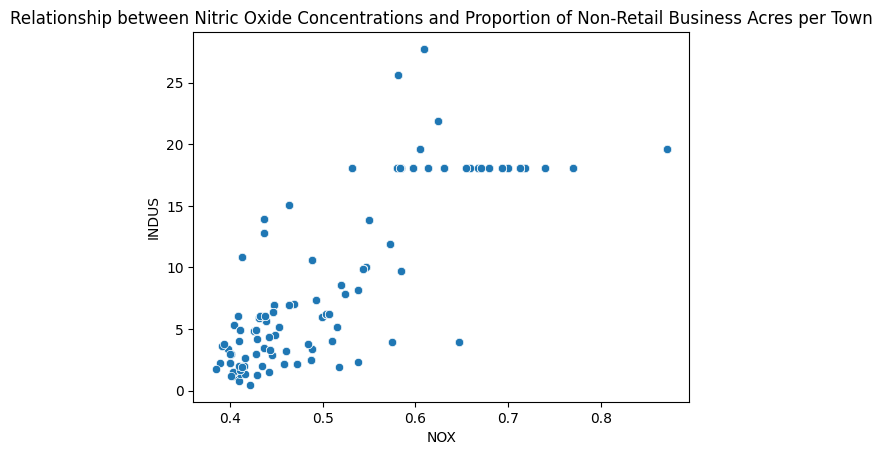

In [9]:
# Create a scatter plot for the 'NOX' variable vs 'INDUS' variable
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

# Set the title for the plot
plt.title('Relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town')

# Display the plot
plt.show()

**What can you say about the relationship?**

For the relationship between the two variables, we can observe the points forming a straing line, it indicates a strong relationship between the variables.

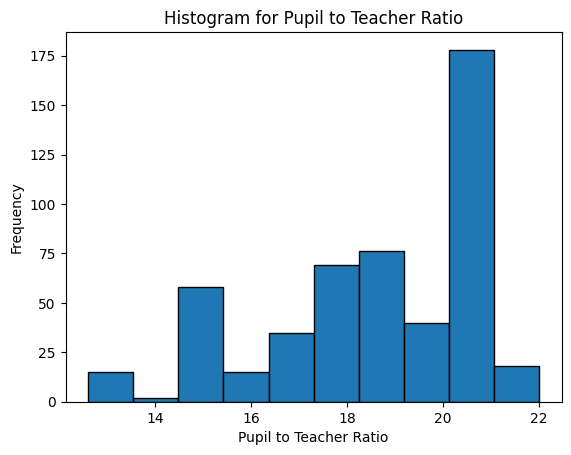

In [10]:
# Create a histogram for the 'PTRATIO' variable
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')

# Set the title for the plot
plt.title('Histogram for Pupil to Teacher Ratio')

# Set the x and y labels
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [12]:
# Separate the data into two groups
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test for independent samples
t_stat, p_value = stats.ttest_ind(bounded, not_bounded) 

# Print the p-value
print(f'p-value: {p_value}')

# State the conclusion from the test
if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there ia a significant difference in the median value of houses bounded by the Charles river or not.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no significant difference in the median value of houses bounded by the Charles river or not.')


p-value: 7.390623170519905e-05
We reject the null hypothesis and conclude that there ia a significant difference in the median value of houses bounded by the Charles river or not.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) 

In [15]:
# Discretize the 'AGE' variable into three groups
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years','70 years and older'])

# Seperate the data into theree groups
group1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
group3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# Perform the ANOVA test
f_stat, p_value = stats.f_oneway(group1, group2, group3)

# Print the p-value
print(f'p-value: {p_value}')

# State the conclusion from the test
if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there ia a significant difference in the median value of houses for each proportion of owner-occupied units built prior to 1940.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no significant difference in the median value of houses for each proportion of owner-occupied units built prior to 1940.')



p-value: 1.7105011022702984e-15
We reject the null hypothesis and conclude that there ia a significant difference in the median value of houses for each proportion of owner-occupied units built prior to 1940.


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [18]:
# Calculate the Pearson Correlation Coefficient and the p-value
corr_coeff, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the correlation coefficient and the p-value
print(f'Correlation Coefficient: {corr_coeff}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('We reject the null hypothesis and conclude that there is a realtionship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')
else:
    print('We fail to reject the null hypothesis and conclude that there is no realtionship between Nitric oxide concentrations and the proportion of non-retail business acres per town.')


Correlation Coefficient: 0.7636514469209158
p-value: 7.91336106123623e-98
We reject the null hypothesis and conclude that there is a realtionship between Nitric oxide concentrations and the proportion of non-retail business acres per town.



### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [31]:
# Define the independent and dependet variable
x = boston_df['DIS']
y = boston_df['MEDV']

# Fit the model with the data
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

# Calculate the predisction
predisction = model.predict(x)

# Summary the results
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        13:18:18   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The DIS coefficient of 1.0916 suggests that including an extra weighted distance to the 5 employment centers in Boston leads to a 1.0916 unit increase in the median value of owner-occupied homes.